# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

<br>

I feel like I already learned quite a lot about DTMs and NTMs before looking at these files, but it was still nice to go over them and reinforce concepts such as the format used for TM transitions and the utility of TMs. One new thing I learned was the use of the Jove explore_tm() function which is very useful for seeing the steps of the TM especially since it shows the current state of the tape for each step.

<br>

It was also interesting to see the difference between DTMs and NTMs. They seem to follow similar rules to DFAs and NFAs, though NTMs don’t have a normal epsilon transition like NFAs do. The closest to an epsilon transition would be a transition on a blank entry. Similarly, while DFAs cannot have empty string transitions, DTMs can have blank entry transitions.

<br>

The drawing Jove made for the DTMs and NTMs also brought up a couple of questions. DFAs can of course have a black hole state, and by similar logic so can a DTM. However, there does not seem to be any tool in Jove that allows for a DTM to be drawn with a potential black hole state. But based on the wpw_tm DTM, DTMs must be able to have black hole states as not every state in wpw_tm has a transition for each character in the input or tape alphabets.

<br>

Another interesting thing my group noticed while looking at these documents was the difference between wpw_tm and wwndtm_md even though they seemed to calculate the same thing (that being if a given string is in the form *ww*). While wpw_tm requires a center dummy symbol, wwndtm_md can just take an unformatted string of 0s and 1s and perform the calculation, at the expense of requiring significantly more states.

<br>

The expense of requiring significantly more states was another observation I had. Especially considering the second document, it seems that TMs can get very complicated very fast even if the given calculation is fairly simple.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import *

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


### Rules Note:

With the advice of Brother Neff, we used the symbol ‘#’ to indicate which symbol should be removed from the string.

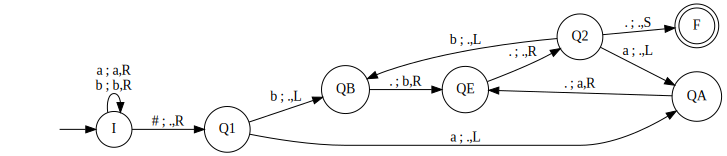

In [6]:
delCharTM = md2mc('''TM
I : a ; a, R -> I
I : b ; b, R -> I
I : # ; ., R -> Q1

Q1 : a ; ., L -> QA
Q1 : b ; ., L -> QB

!! Q2 state required to avoid deleting final character.
Q2 : a ; ., L -> QA
Q2 : b ; ., L -> QB
Q2 : . ; ., S -> F

QA : . ; a, R -> QE

QB : . ; b, R -> QE

QE : . ; ., R -> Q2
QE : . ; ., R -> Q2
''')
DOdelCharTM = dotObj_tm(delCharTM, FuseEdges=True)
DOdelCharTM

In [7]:
explore_tm(delCharTM, "abb#aa", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, 'abbaa.........', 89)
 via .. 
 ->('I', 0, 'abb#aa', 100)
 ->('I', 1, 'abb#aa', 99)
 ->('I', 2, 'abb#aa', 98)
 ->('I', 3, 'abb#aa', 97)
 ->('Q1', 4, 'abb.aa', 96)
 ->('QA', 3, 'abb..a', 95)
 ->('QE', 4, 'abba.a', 94)
 ->('Q2', 5, 'abba.a', 93)
 ->('QA', 4, 'abba..', 92)
 ->('QE', 5, 'abbaa.', 91)
 ->('Q2', 6, 'abbaa.', 90)
 ->('F', 6, 'abbaa.........', 89)


In [9]:
explore_tm(delCharTM, "#babba", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, 'babba.........', 83)
 via .. 
 ->('I', 0, '#babba', 100)
 ->('Q1', 1, '.babba', 99)
 ->('QB', 0, '..abba', 98)
 ->('QE', 1, 'b.abba', 97)
 ->('Q2', 2, 'b.abba', 96)
 ->('QA', 1, 'b..bba', 95)
 ->('QE', 2, 'ba.bba', 94)
 ->('Q2', 3, 'ba.bba', 93)
 ->('QB', 2, 'ba..ba', 92)
 ->('QE', 3, 'bab.ba', 91)
 ->('Q2', 4, 'bab.ba', 90)
 ->('QB', 3, 'bab..a', 89)
 ->('QE', 4, 'babb.a', 88)
 ->('Q2', 5, 'babb.a', 87)
 ->('QA', 4, 'babb..', 86)
 ->('QE', 5, 'babba.', 85)
 ->('Q2', 6, 'babba.', 84)
 ->('F', 6, 'babba.........', 83)


In [42]:
# Should not be accepted.
explore_tm(delCharTM, "abbbb#", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('Q1', 6, 'abbbb.', 94)
 via .. 
 ->('I', 0, 'abbbb#', 100)
 ->('I', 1, 'abbbb#', 99)
 ->('I', 2, 'abbbb#', 98)
 ->('I', 3, 'abbbb#', 97)
 ->('I', 4, 'abbbb#', 96)
 ->('I', 5, 'abbbb#', 95)
 ->('Q1', 6, 'abbbb.', 94)


## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


### Rules Note:

Our TM accepts two inputs. The first is a single character we want to add which is immediately followed by the second input. This second input is the string we want to modify. Within the string, we will have one of two markers, a captial 'A' or a captial 'B'. These act as 'a' or 'b', but they also mark where the input will be. The new character will be input to the left of the current one and the capitalized marker will be made lowercase.

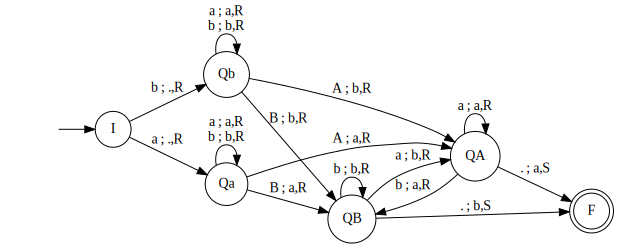

In [22]:
addCharTM = md2mc('''TM
I : a ; ., R -> Qa
I : b ; ., R -> Qb

Qa : a ; a, R -> Qa
Qa : b ; b, R -> Qa
Qa : A ; a, R -> QA
Qa : B ; a, R -> QB

Qb : a ; a, R -> Qb
Qb : b ; b, R -> Qb
Qb : A ; b, R -> QA
Qb : B ; b, R -> QB

QA : a ; a, R -> QA
QA : b ; a, R -> QB
QA : . ; a, S -> F

QB : a ; b, R -> QA
QB : b ; b, R -> QB
QB : . ; b, S -> F



''')
DOaddCharTM = dotObj_tm(addCharTM, FuseEdges=True)
DOaddCharTM

In [26]:
explore_tm(addCharTM, "bbbaabaBa", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 9, '.bbaababba.......', 90)
 via .. 
 ->('I', 0, 'bbbaabaBa', 100)
 ->('Qb', 1, '.bbaabaBa', 99)
 ->('Qb', 2, '.bbaabaBa', 98)
 ->('Qb', 3, '.bbaabaBa', 97)
 ->('Qb', 4, '.bbaabaBa', 96)
 ->('Qb', 5, '.bbaabaBa', 95)
 ->('Qb', 6, '.bbaabaBa', 94)
 ->('Qb', 7, '.bbaabaBa', 93)
 ->('QB', 8, '.bbaababa', 92)
 ->('QA', 9, '.bbaababb', 91)
 ->('F', 9, '.bbaababba.......', 90)


In [25]:
explore_tm(addCharTM, "baAabbbaa", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 9, '.abaabbbaa.......', 90)
 via .. 
 ->('I', 0, 'baAabbbaa', 100)
 ->('Qb', 1, '.aAabbbaa', 99)
 ->('Qb', 2, '.aAabbbaa', 98)
 ->('QA', 3, '.ababbbaa', 97)
 ->('QA', 4, '.ababbbaa', 96)
 ->('QB', 5, '.abaabbaa', 95)
 ->('QB', 6, '.abaabbaa', 94)
 ->('QB', 7, '.abaabbaa', 93)
 ->('QA', 8, '.abaabbba', 92)
 ->('QA', 9, '.abaabbba', 91)
 ->('F', 9, '.abaabbbaa.......', 90)


In [24]:
explore_tm(addCharTM, "aabbbBa", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 7, '.abbbaba.......', 92)
 via .. 
 ->('I', 0, 'aabbbBa', 100)
 ->('Qa', 1, '.abbbBa', 99)
 ->('Qa', 2, '.abbbBa', 98)
 ->('Qa', 3, '.abbbBa', 97)
 ->('Qa', 4, '.abbbBa', 96)
 ->('Qa', 5, '.abbbBa', 95)
 ->('QB', 6, '.abbbaa', 94)
 ->('QA', 7, '.abbbab', 93)
 ->('F', 7, '.abbbaba.......', 92)


In [23]:
explore_tm(addCharTM, "aabbbB", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.abbbab.......', 93)
 via .. 
 ->('I', 0, 'aabbbB', 100)
 ->('Qa', 1, '.abbbB', 99)
 ->('Qa', 2, '.abbbB', 98)
 ->('Qa', 3, '.abbbB', 97)
 ->('Qa', 4, '.abbbB', 96)
 ->('Qa', 5, '.abbbB', 95)
 ->('QB', 6, '.abbba', 94)
 ->('F', 6, '.abbbab.......', 93)


## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

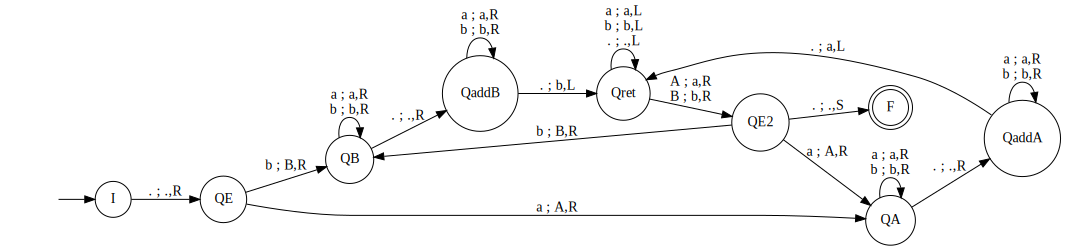

In [36]:
cpyStrTM = md2mc('''TM
I : . ; ., R -> QE

QE : a ; A, R -> QA
QE : b ; B, R -> QB

QE2 : a ; A, R -> QA
QE2 : b ; B, R -> QB
QE2 : . ; ., S -> F

QA : a ; a, R -> QA
QA : b ; b, R -> QA
QA : . ; ., R -> QaddA

QB : a ; a, R -> QB
QB : b ; b, R -> QB
QB : . ; ., R -> QaddB


QaddA : a ; a, R -> QaddA
QaddA : b ; b, R -> QaddA
QaddA : . ; a, L -> Qret

QaddB : a ; a, R -> QaddB
QaddB : b ; b, R -> QaddB
QaddB : . ; b, L -> Qret

Qret : a ; a, L -> Qret
Qret : b ; b, L -> Qret
Qret : . ; ., L -> Qret
Qret : A ; a, R -> QE2
Qret : B ; b, R -> QE2





''')
DOcpyStrTM = dotObj_tm(cpyStrTM, FuseEdges=True)
DOcpyStrTM

In [37]:
explore_tm(cpyStrTM, ".aab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 4, '.aab.aab....', 71)
 via .. 
 ->('I', 0, '.aab', 100)
 ->('QE', 1, '.aab', 99)
 ->('QA', 2, '.Aab', 98)
 ->('QA', 3, '.Aab', 97)
 ->('QA', 4, '.Aab', 96)
 ->('QaddA', 5, '.Aab........', 95)
 ->('Qret', 4, '.Aab.a......', 94)
 ->('Qret', 3, '.Aab.a......', 93)
 ->('Qret', 2, '.Aab.a......', 92)
 ->('Qret', 1, '.Aab.a......', 91)
 ->('QE2', 2, '.aab.a......', 90)
 ->('QA', 3, '.aAb.a......', 89)
 ->('QA', 4, '.aAb.a......', 88)
 ->('QaddA', 5, '.aAb.a......', 87)
 ->('QaddA', 6, '.aAb.a......', 86)
 ->('Qret', 5, '.aAb.aa.....', 85)
 ->('Qret', 4, '.aAb.aa.....', 84)
 ->('Qret', 3, '.aAb.aa.....', 83)
 ->('Qret', 2, '.aAb.aa.....', 82)
 ->('QE2', 3, '.aab.aa.....', 81)
 ->('QB', 4, '.aaB.aa.....', 80)
 ->('QaddB', 5, '.aaB.aa.....', 79)
 ->('QaddB', 6, '.aaB.aa.....', 78)
 ->('QaddB', 7, '.aaB.aa.....', 77)
 ->('Qret', 6, '.aaB.aab....', 76)
 ->('Qret', 5, '.aaB.aab....', 75)
 ->('Qret', 4, '.

In [38]:
explore_tm(cpyStrTM, ".baabbbaaabab", 500)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 13, '.baabbbaaabab.baabbbaaabab...', 174)
 via .. 
 ->('I', 0, '.baabbbaaabab', 500)
 ->('QE', 1, '.baabbbaaabab', 499)
 ->('QB', 2, '.Baabbbaaabab', 498)
 ->('QB', 3, '.Baabbbaaabab', 497)
 ->('QB', 4, '.Baabbbaaabab', 496)
 ->('QB', 5, '.Baabbbaaabab', 495)
 ->('QB', 6, '.Baabbbaaabab', 494)
 ->('QB', 7, '.Baabbbaaabab', 493)
 ->('QB', 8, '.Baabbbaaabab', 492)
 ->('QB', 9, '.Baabbbaaabab', 491)
 ->('QB', 10, '.Baabbbaaabab', 490)
 ->('QB', 11, '.Baabbbaaabab', 489)
 ->('QB', 12, '.Baabbbaaabab', 488)
 ->('QB', 13, '.Baabbbaaabab', 487)
 ->('QaddB', 14, '.Baabbbaaabab........', 486)
 ->('Qret', 13, '.Baabbbaaabab.b......', 485)
 ->('Qret', 12, '.Baabbbaaabab.b......', 484)
 ->('Qret', 11, '.Baabbbaaabab.b......', 483)
 ->('Qret', 10, '.Baabbbaaabab.b......', 482)
 ->('Qret', 9, '.Baabbbaaabab.b......', 481)
 ->('Qret', 8, '.Baabbbaaabab.b......', 480)
 -

In [40]:
explore_tm(cpyStrTM, ".b", 500)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 2, '.b.b......', 493)
 via .. 
 ->('I', 0, '.b', 500)
 ->('QE', 1, '.b', 499)
 ->('QB', 2, '.B', 498)
 ->('QaddB', 3, '.B........', 497)
 ->('Qret', 2, '.B.b......', 496)
 ->('Qret', 1, '.B.b......', 495)
 ->('QE2', 2, '.b.b......', 494)
 ->('F', 2, '.b.b......', 493)


In [41]:
explore_tm(cpyStrTM, ".a", 500)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 2, '.a.a......', 493)
 via .. 
 ->('I', 0, '.a', 500)
 ->('QE', 1, '.a', 499)
 ->('QA', 2, '.A', 498)
 ->('QaddA', 3, '.A........', 497)
 ->('Qret', 2, '.A.a......', 496)
 ->('Qret', 1, '.A.a......', 495)
 ->('QE2', 2, '.a.a......', 494)
 ->('F', 2, '.a.a......', 493)


In [43]:
# Should not be accepted.
explore_tm(cpyStrTM, ".", 500)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('QE', 1, '.', 499)
 via .. 
 ->('I', 0, '.', 500)
 ->('QE', 1, '.', 499)


In [44]:
# Should not be accepted.
explore_tm(cpyStrTM, "aba", 500)

Detailing the halted configs now.
Rejected at  ('I', 0, 'aba', 500)
 via .. 
 ->('I', 0, 'aba', 500)


## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [45]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [46]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


<br>

Our TM accepts two inputs. The first is a single character we want to add which is immediately followed by the second input. This second input is the string we want to modify. Within the string, we will have one of two markers, a captial 'A' or a captial 'B'. These act as 'a' or 'b', but they also mark where the input will be. The new character will be input to the left of the current one and the capitalized marker will be made lowercase.<br>

The below TM makes use of our previously implemented cpyStrTM and addCharTM Turing machines. A modified version of cpyStrTM is used to copy the current state of the tape such that the proceeding method will only affect the copy, leaving a trace of the previous value on the tape. cpyStrTM is placed between each edge leading into the “goto_lsb” state. It is also placed after the “branch” state’s transition that loops back to itself. Though, in this case, that transition will go back to the “goto_lsb” state after exiting cpyStrTM.

<br>

The addCharTM was split into two sections. One is placed between the “. ; 0, L” transition that goes from the “10_fma” state to the “01_fma” state. This version of the addCharTM will only add a 0 at the defined location. The second addCharTM variation is placed between the “01_fma” state to “goto_lsb” state transition and will only add a 1 at the defined location.

<br>

Some other helper states were also added such as a Qainter and Qbinter which help with moving to the addCharTM variations. There were also a few states and transitions adjusted to account for the “*”s between each copy of the tape’s current state.


<br>

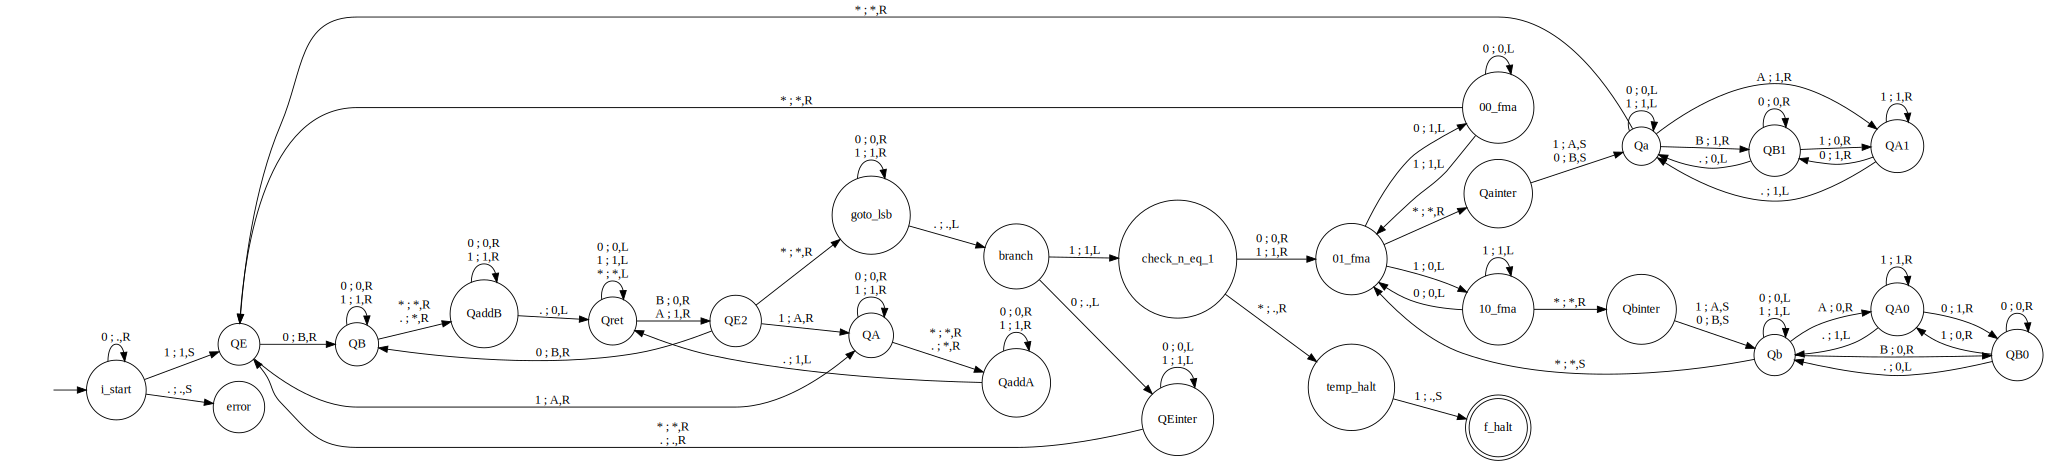

In [77]:
# Base code from Ian Briggs.

'''
(src='File', fname='../../machines/tmfiles/collatz_tm.tm')
'''

collatz_tm = md2mc(
"""
TM

i_start      : 0; ., R -> i_start             !! erase this zero and try to find more
!! i_start      : 1; 1, R -> goto_lsb            !! we have a proper number, go to the lsb
i_start      : 1; 1, S -> QE                  !! Perform initial copy.
i_start      : .; ., S -> error               !! error on no input or input == 0


goto_lsb     : 0; 0,R | 1; 1,R -> goto_lsb    !! scan off the right edge of the number
goto_lsb     : .; .,L -> branch               !! take a step back to be on the lsb and start branch


!!branch       : 0; .,L -> branch               !! number is even, divide by two and re-branch
branch       : 0; .,L -> QEinter

QEinter : 0 ; 0, L -> QEinter
QEinter : 1 ; 1, L -> QEinter
QEinter : . ; ., R -> QE
QEinter : * ; *, R -> QE

branch       : 1; 1,L -> check_n_eq_1         !! number is odd, check if it is 1


check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma      !! number wasn't 1, goto 3n+1
!! check_n_eq_1 : .; .,R -> f_halt               !! number was 1, halt
check_n_eq_1 : *; .,R -> temp_halt

temp_halt : 1; ., S -> f_halt


!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma       : 0; 0,L -> 00_fma

!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma       : 1; 1,L -> 01_fma

!! reached the end of the number, go back to the start
!! 00_fma       : .; .,R -> goto_lsb  
00_fma       : *; *,R -> QE           


!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma       : 0; 1,L -> 00_fma  

!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma       : 1; 0,L -> 10_fma  

!! reached the end of the number, write our 1 and go back to the start
!! 01_fma       : .; 1,R -> goto_lsb 
01_fma : *; *, R -> Qainter

Qainter : 0 ; B, S -> Qa
Qainter : 1 ; A, S -> Qa


!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma       : 0; 0,L -> 01_fma

!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma       : 1; 1,L -> 10_fma

!! reached the end of the number, write a 0 from our 10 and carry 1
!!10_fma       : .; 0,L -> 01_fma
10_fma : * ; *, R -> Qbinter

Qbinter : 0 ; B, S -> Qb
Qbinter : 1 ; A, S -> Qb









QE : 1 ; A, R -> QA
QE : 0 ; B, R -> QB

QE2 : 1 ; A, R -> QA
QE2 : 0 ; B, R -> QB 
QE2 : * ; *, R -> goto_lsb 

QA : 1 ; 1, R -> QA
QA : 0 ; 0, R -> QA
QA : . ; *, R -> QaddA
QA : * ; *, R -> QaddA

QB : 1 ; 1, R -> QB
QB : 0 ; 0, R -> QB
QB : . ; *, R -> QaddB
QB : * ; *, R -> QaddB

QaddA : 1 ; 1, R -> QaddA
QaddA : 0 ; 0, R -> QaddA
QaddA : . ; 1, L -> Qret

QaddB : 1 ; 1, R -> QaddB
QaddB : 0 ; 0, R -> QaddB
QaddB : . ; 0, L -> Qret

Qret : 1 ; 1, L -> Qret
Qret : 0 ; 0, L -> Qret
Qret : * ; *, L -> Qret
Qret : A ; 1, R -> QE2
Qret : B ; 0, R -> QE2








Qb : 1 ; 1, L -> Qb
Qb : 0 ; 0, L -> Qb
Qb : A ; 0, R -> QA0
Qb : B ; 0, R -> QB0
Qb : * ; *, S -> 01_fma

QA0 : 1 ; 1, R -> QA0
QA0 : 0 ; 1, R -> QB0
QA0 : . ; 1, L -> Qb

QB0 : 1 ; 0, R -> QA0
QB0 : 0 ; 0, R -> QB0
QB0 : . ; 0, L -> Qb




Qa : 1 ; 1, L -> Qa
Qa : 0 ; 0, L -> Qa
Qa : A ; 1, R -> QA1
Qa : B ; 1, R -> QB1
Qa : * ; *, R -> QE

QA1 : 1 ; 1, R -> QA1
QA1 : 0 ; 1, R -> QB1
QA1 : . ; 1, L -> Qa

QB1 : 1 ; 0, R -> QA1
QB1 : 0 ; 0, R -> QB1
QB1 : . ; 0, L -> Qa



"""
)

DOcollatz = dotObj_tm(collatz_tm, FuseEdges=True)
DOcollatz

In [78]:
explore_tm(collatz_tm, "11", 10000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 32, '11*1010*101*10000*1000*100*10*1...', 9644)
 via .. 
 ->('i_start', 0, '11', 10000)
 ->('QE', 0, '11', 9999)
 ->('QA', 1, 'A1', 9998)
 ->('QA', 2, 'A1', 9997)
 ->('QaddA', 3, 'A1*.......', 9996)
 ->('Qret', 2, 'A1*1......', 9995)
 ->('Qret', 1, 'A1*1......', 9994)
 ->('Qret', 0, 'A1*1......', 9993)
 ->('QE2', 1, '11*1......', 9992)
 ->('QA', 2, '1A*1......', 9991)
 ->('QaddA', 3, '1A*1......', 9990)
 ->('QaddA', 4, '1A*1......', 9989)
 ->('Qret', 3, '1A*11.....', 9988)
 ->('Qret', 2, '1A*11.....', 9987)
 ->('Qret', 1, '1A*11.....', 9986)
 ->('QE2', 2, '11*11.....', 9985)
 ->('goto_lsb', 3, '11*11.....', 9984)
 ->('goto_lsb', 4, '11*11.....', 9983)
 ->('goto_lsb', 5, '11*11.....', 9982)
 ->('branch', 4, '11*11.....', 9981)
 ->('check_n_eq_1', 3, '11*11.....', 9980)
 ->

In [79]:
explore_tm(collatz_tm, "100", 10000)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 9, '100*10*1...', 9931)
 via .. 
 ->('i_start', 0, '100', 10000)
 ->('QE', 0, '100', 9999)
 ->('QA', 1, 'A00', 9998)
 ->('QA', 2, 'A00', 9997)
 ->('QA', 3, 'A00', 9996)
 ->('QaddA', 4, 'A00*.......', 9995)
 ->('Qret', 3, 'A00*1......', 9994)
 ->('Qret', 2, 'A00*1......', 9993)
 ->('Qret', 1, 'A00*1......', 9992)
 ->('Qret', 0, 'A00*1......', 9991)
 ->('QE2', 1, '100*1......', 9990)
 ->('QB', 2, '1B0*1......', 9989)
 ->('QB', 3, '1B0*1......', 9988)
 ->('QaddB', 4, '1B0*1......', 9987)
 ->('QaddB', 5, '1B0*1......', 9986)
 ->('Qret', 4, '1B0*10.....', 9985)
 ->('Qret', 3, '1B0*10.....', 9984)
 ->('Qret', 2, '1B0*10.....', 9983)
 ->('Qret', 1, '1B0*10.....', 9982)
 ->('QE2', 2, '100*10.....', 9981)
 ->('QB', 3, '10B*10.....', 9980)
 ->('QaddB', 4, '10B*10.....', 9979)
 ->('QaddB', 5, '10B*10.....', 9978)
 ->('QaddB', 6, '10B*10.....', 9977)
 ->('Qret', 5, '10B*100....', 9976)
 ->('Qret', 4, 

In [80]:
explore_tm(collatz_tm, "1011", 10000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 78, '1011*100010*10001*110100*11010*1101*101000*10100*1010*101*10000*1000*100*10*1.......', 8956)
 via .. 
 ->('i_start', 0, '1011', 10000)
 ->('QE', 0, '1011', 9999)
 ->('QA', 1, 'A011', 9998)
 ->('QA', 2, 'A011', 9997)
 ->('QA', 3, 'A011', 9996)
 ->('QA', 4, 'A011', 9995)
 ->('QaddA', 5, 'A011*.......', 9994)
 ->('Qret', 4, 'A011*1......', 9993)
 ->('Qret', 3, 'A011*1......', 9992)
 ->('Qret', 2, 'A011*1......', 9991)
 ->('Qret', 1, 'A011*1......', 9990)
 ->('Qret', 0, 'A011*1......', 9989)
 ->('QE2', 1, '1011*1......', 9988)
 ->('QB'

In [81]:
explore_tm(collatz_tm, "1", 1000)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 2, '1........', 988)
 via .. 
 ->('i_start', 0, '1', 1000)
 ->('QE', 0, '1', 999)
 ->('QA', 1, 'A', 998)
 ->('QaddA', 2, 'A*.......', 997)
 ->('Qret', 1, 'A*1......', 996)
 ->('Qret', 0, 'A*1......', 995)
 ->('QE2', 1, '1*1......', 994)
 ->('goto_lsb', 2, '1*1......', 993)
 ->('goto_lsb', 3, '1*1......', 992)
 ->('branch', 2, '1*1......', 991)
 ->('check_n_eq_1', 1, '1*1......', 990)
 ->('temp_halt', 2, '1.1......', 989)
 ->('f_halt', 2, '1........', 988)


In [83]:
explore_tm(collatz_tm, "1001100", 100000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 133, '1001100*100110*10011*111010*11101*1011000*101100*10110*1011*100010*10001*110100*11010*1101*101000*10100*1010*101*10000*1000*100*10*1...', 98089)
 via .. 
 ->('i_start', 0, '1001100', 100000)
 ->('QE', 0, '1001100', 99999)
 ->('QA', 1, 'A001100', 99998)
 ->('QA', 2, 'A001100', 99997)
 ->('QA', 3,